In [25]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Laterais_Brasileirao/df_laterais_dir_102025.csv'

In [26]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [27]:
data = pd.read_csv(path, sep=';')

In [28]:
data.head()

,Jogador,Minutos,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,PPA,Crosses,SCA,CrsPA,GCA,PPG
0,Paulo Henrique,1863,48,27,34,25,845,78.5,74,66,28,88,59,20,9,1.22
1,Agustin Giay,1660,37,14,18,13,818,82.3,26,75,9,33,42,5,1,2.23
2,William,1468,32,27,24,18,672,72.5,28,61,23,99,60,14,7,1.93
3,Lucas Ramon,2019,37,42,21,15,758,70.7,49,74,35,97,58,25,7,1.70
4,Emerson Royal,527,10,11,6,6,242,82.9,15,20,6,17,16,2,0,2.12


In [29]:
data.rename(columns={'Minutos': 'Minutes'}, inplace=True)

In [30]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Cmp/90'] = (data['Cmp'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['PassBlocks/90'] = (data['PassBlocks'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['PPA/90'] = (data['PPA'] * 90) / (data['Minutes'])
data['Crosses/90'] = (data['Crosses'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['CrsPA/90'] = (data['CrsPA'] * 90) / (data['Minutes'])
data['GCA/90'] = (data['GCA'] * 90) / (data['Minutes'])

In [31]:
data.head()

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,Cmp/90,Blocks/90,PassBlocks/90,PrgC/90,PrgP/90,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90
0,Paulo Henrique,1863,48,27,34,25,845,78.5,74,66,...,40.821256,1.642512,1.207729,3.574879,3.188406,1.352657,4.251208,2.850242,0.966184,0.434783
1,Agustin Giay,1660,37,14,18,13,818,82.3,26,75,...,44.349398,0.975904,0.704819,1.409639,4.066265,0.487952,1.789157,2.277108,0.271084,0.054217
2,William,1468,32,27,24,18,672,72.5,28,61,...,41.198910,1.471390,1.103542,1.716621,3.739782,1.410082,6.069482,3.678474,0.858311,0.429155
3,Lucas Ramon,2019,37,42,21,15,758,70.7,49,74,...,33.789004,0.936107,0.668648,2.184250,3.298663,1.560178,4.323923,2.585438,1.114413,0.312036
4,Emerson Royal,527,10,11,6,6,242,82.9,15,20,...,41.328273,1.024668,1.024668,2.561670,3.415560,1.024668,2.903226,2.732448,0.341556,0.000000


In [32]:
data['Cmp%'] = data['Cmp%'] / 100

In [33]:
data.head()

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,Cmp/90,Blocks/90,PassBlocks/90,PrgC/90,PrgP/90,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90
0,Paulo Henrique,1863,48,27,34,25,845,0.785,74,66,...,40.821256,1.642512,1.207729,3.574879,3.188406,1.352657,4.251208,2.850242,0.966184,0.434783
1,Agustin Giay,1660,37,14,18,13,818,0.823,26,75,...,44.349398,0.975904,0.704819,1.409639,4.066265,0.487952,1.789157,2.277108,0.271084,0.054217
2,William,1468,32,27,24,18,672,0.725,28,61,...,41.198910,1.471390,1.103542,1.716621,3.739782,1.410082,6.069482,3.678474,0.858311,0.429155
3,Lucas Ramon,2019,37,42,21,15,758,0.707,49,74,...,33.789004,0.936107,0.668648,2.184250,3.298663,1.560178,4.323923,2.585438,1.114413,0.312036
4,Emerson Royal,527,10,11,6,6,242,0.829,15,20,...,41.328273,1.024668,1.024668,2.561670,3.415560,1.024668,2.903226,2.732448,0.341556,0.000000


In [34]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA', 'PPG',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'],
      dtype='object')

In [35]:
# Criando Métricas

# Defesa: tackles + interceptações + blocks + pass blocks
data['def_score'] = (
    data['TklW/90'] +
    data['Int/90'] +
    data['Blocks/90'] +
    data['PassBlocks/90']
)

# Construção: progressões de passe + passes para a área
data['build_score'] = (
    data['PrgP/90'] +
    data['PPA/90']
)

# Ataque: criação de chances + conduções + cruzamentos para a área
data['att_score'] = (
    data['SCA/90'] +
    data['PrgC/90'] +
    data['CrsPA/90'] +
    data['GCA/90']
)

# Score final simples (sem pesos por enquanto)
data['fba_score'] = data['def_score'] + data['build_score'] + data['att_score']

In [36]:
data['minutes_weight'] = np.minimum(1.0, np.sqrt(data['Minutes'] / 2700.0))
data['fba_score'] *= data['minutes_weight']

In [37]:
data.head(15)

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90,def_score,build_score,att_score,fba_score,minutes_weight
0,Paulo Henrique,1863,48,27,34,25,845,0.785,74,66,...,1.352657,4.251208,2.850242,0.966184,0.434783,6.473430,4.541063,7.826087,15.650161,0.830662
1,Agustin Giay,1660,37,14,18,13,818,0.823,26,75,...,0.487952,1.789157,2.277108,0.271084,0.054217,4.445783,4.554217,4.012048,10.202764,0.784101
2,William,1468,32,27,24,18,672,0.725,28,61,...,1.410082,6.069482,3.678474,0.858311,0.429155,6.192098,5.149864,6.682561,13.290610,0.737363
3,Lucas Ramon,2019,37,42,21,15,758,0.707,49,74,...,1.560178,4.323923,2.585438,1.114413,0.312036,5.126300,4.858841,6.196137,13.992622,0.864741
4,Emerson Royal,527,10,11,6,6,242,0.829,15,20,...,1.024668,2.903226,2.732448,0.341556,0.000000,5.635674,4.440228,5.635674,6.941337,0.441798
5,Vitinho,2084,31,18,26,19,808,0.793,39,70,...,0.863724,3.714012,2.072937,0.604607,0.043186,4.059501,3.886756,4.404990,10.851201,0.878551
6,Gilberto,1416,27,14,12,4,797,0.847,33,63,...,0.699153,1.906780,2.288136,0.254237,0.127119,3.622881,4.703390,4.766949,9.481919,0.724185
7,Eros Mancuso,1307,18,15,13,12,513,0.794,22,50,...,0.757460,2.754399,2.065800,0.344300,0.413160,3.993879,4.200459,4.338179,8.719553,0.695754
8,Natanael,1819,30,20,20,13,679,0.820,19,56,...,0.247389,1.880154,1.632765,0.049478,0.000000,4.106652,3.018142,2.622320,8.000378,0.820795
9,Braian Aguirre,1955,32,28,23,14,946,0.774,32,103,...,0.874680,3.038363,1.841432,0.368286,0.138107,4.465473,5.616368,3.820972,11.830257,0.850925


In [38]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA', 'PPG',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90',
       'def_score', 'build_score', 'att_score', 'fba_score', 'minutes_weight'],
      dtype='object')

/tmp/ipython-input-2803372994.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


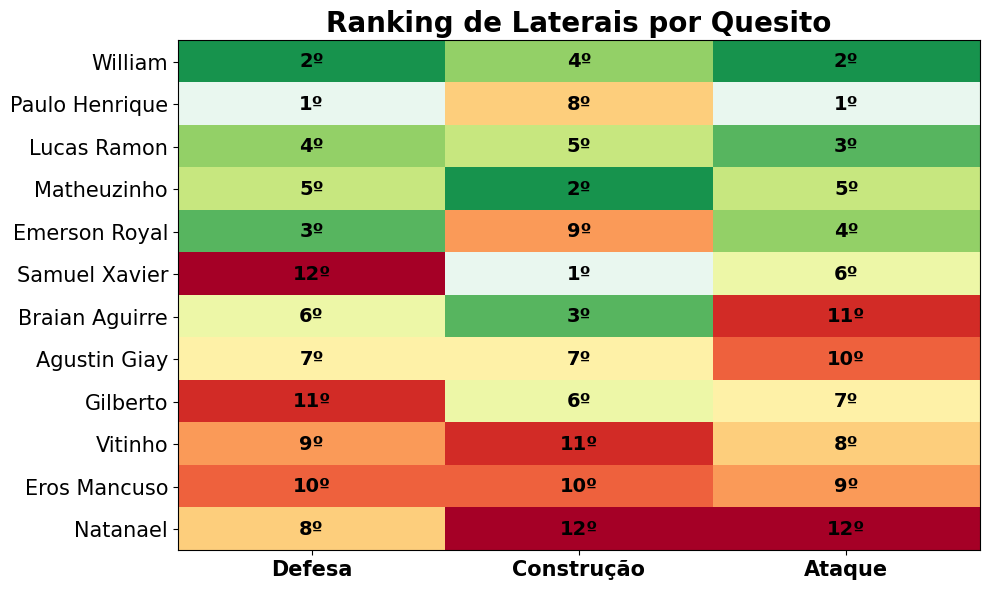

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- ranking para laterais ---
# gera ranks (1 = melhor)
data['rank_def']   = data['def_score'].rank(ascending=False, method='min')
data['rank_build'] = data['build_score'].rank(ascending=False, method='min')
data['rank_att']   = data['att_score'].rank(ascending=False, method='min')

# ranking geral = soma simples (ou faça média se quiser menos sensível a extremos)
data['rank_overall'] = (data['rank_def'] + data['rank_build'] + data['rank_att']).rank(method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_def"]),
    percent_rank_from_rank(idxd["rank_build"]),
    percent_rank_from_rank(idxd["rank_att"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_def"].astype(int).astype(str)   + "º",
    idxd["rank_build"].astype(int).astype(str) + "º",
    idxd["rank_att"].astype(int).astype(str)   + "º",
]

cols = ["Defesa", "Construção", "Ataque"]

# colormap igual (RdYlGn, melhor mais claro)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking de Laterais por Quesito", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_2025.png", dpi=150)
plt.show()


In [40]:
# calcula minutes_weight (penaliza quem tem poucos minutos)
data['minutes_weight'] = np.minimum(1.0, np.sqrt(data['Minutes'] / 2700.0))

# aplica a penalização multiplicando direto nos sub-scores
data['def_score']   = data['def_score']   * data['minutes_weight']
data['build_score'] = data['build_score'] * data['minutes_weight']
data['att_score']   = data['att_score']   * data['minutes_weight']

/tmp/ipython-input-1922515221.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


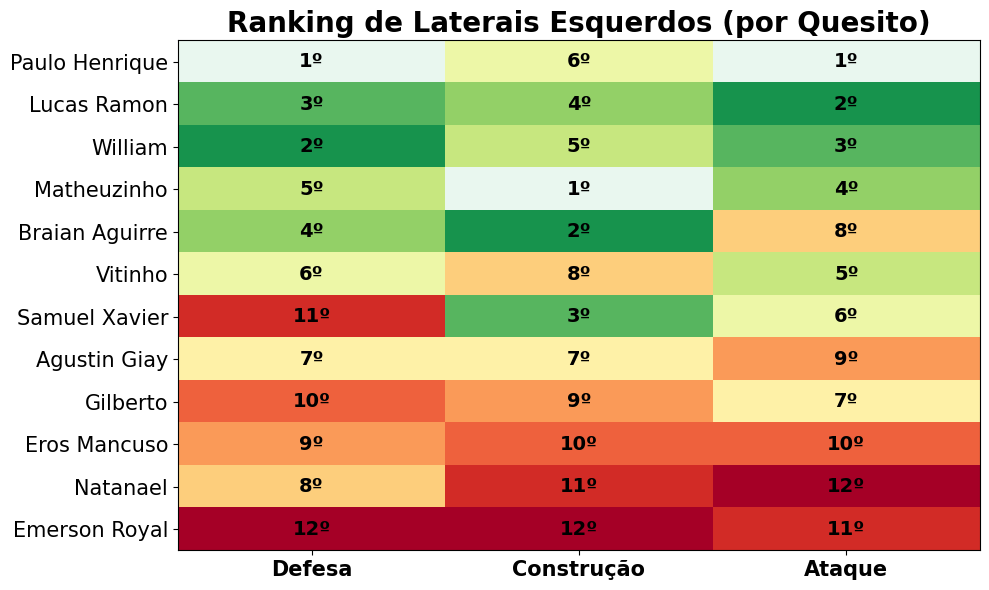

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- ranking para laterais ---
# gera ranks (1 = melhor)
data['rank_def']   = data['def_score'].rank(ascending=False, method='min')
data['rank_build'] = data['build_score'].rank(ascending=False, method='min')
data['rank_att']   = data['att_score'].rank(ascending=False, method='min')

# ranking geral = soma simples (ou faça média se quiser menos sensível a extremos)
data['rank_overall'] = (data['rank_def'] + data['rank_build'] + data['rank_att']).rank(method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_def"]),
    percent_rank_from_rank(idxd["rank_build"]),
    percent_rank_from_rank(idxd["rank_att"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_def"].astype(int).astype(str)   + "º",
    idxd["rank_build"].astype(int).astype(str) + "º",
    idxd["rank_att"].astype(int).astype(str)   + "º",
]

cols = ["Defesa", "Construção", "Ataque"]

# colormap igual (RdYlGn, melhor mais claro)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking de Laterais Esquerdos (por Quesito)", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_2025.png", dpi=150)
plt.show()


In [42]:
data['overall_score'] = (data['def_score'] + data['build_score'] + data['att_score']) * data['minutes_weight']

In [43]:
# ranking geral (1 = melhor)
data['rank_overall'] = data['overall_score'].rank(ascending=False, method='min')

# ordena
ranking = data.sort_values('rank_overall')[['Jogador','Minutes','overall_score','rank_overall',
                                           'def_score','build_score','att_score']]

print(ranking)

           Jogador  Minutes  overall_score  rank_overall  def_score  \
0   Paulo Henrique     1863      13.000000           1.0   5.377235   
3      Lucas Ramon     2019      12.100000           2.0   4.432924   
10     Matheuzinho     1867      11.066667           3.0   3.727961   
9   Braian Aguirre     1955      10.066667           4.0   3.799785   
2          William     1468       9.800000           5.0   4.565822   
5          Vitinho     2084       9.533333           6.0   3.566479   
1     Agustin Giay     1660       8.000000           7.0   3.485944   
11   Samuel Xavier     1422       7.933333           8.0   2.572165   
6         Gilberto     1416       6.866667           9.0   2.623638   
8         Natanael     1819       6.566667          10.0   3.370718   
7     Eros Mancuso     1307       6.066667          11.0   2.778759   
4    Emerson Royal      527       3.066667          12.0   2.489828   

    build_score  att_score  
0      3.772090   6.500836  
3      4.201641   

/tmp/ipython-input-2017892274.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


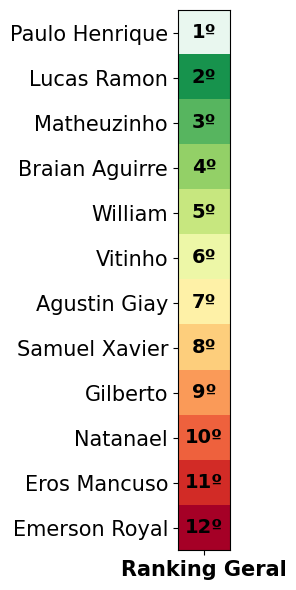

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# ranking geral simples (sem pesos individuais)
data['rank_overall'] = data['overall_score'].rank(ascending=False, method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# valores normalizados para heatmap (só 1 coluna)
vals = np.c_[percent_rank_from_rank(idxd["rank_overall"])]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[idxd["rank_overall"].astype(int).astype(str) + "º"]

cols = ["Ranking Geral"]

# colormap igual (RdYlGn)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(2.5, max(6, 0.45*len(order))))  # largura menor, só 1 coluna
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    ax.text(0, i, labels[i, 0], ha="center", va="center",
            fontsize=FS_CELLS, fontweight="bold")

#ax.set_title("Ranking Geral", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_overall_2025.png", dpi=150)
plt.show()